<a href="https://colab.research.google.com/github/erSASD/machine_learning/blob/main/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.19.4
Pandas: 1.1.5



### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-12-28 to 2015-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [3]:
df


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-28,3194.0000,3304.0000,3172.69,3283.96,5686787
2020-12-24,3193.9000,3202.0000,3169.00,3172.69,1451917
2020-12-23,3205.0000,3210.1300,3184.17,3185.27,2093787
2020-12-22,3202.8434,3222.0000,3180.08,3206.52,2381781
2020-12-21,3200.0100,3226.9666,3166.00,3206.18,3836846
...,...,...,...,...,...
2016-01-07,621.8000,630.0000,605.21,607.94,6904855
2016-01-06,622.0000,639.7900,620.31,632.65,4032139
2016-01-05,646.8600,646.9100,627.65,633.79,4479599


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-28,3194.0000,3304.0000,3172.69,3283.96,5686787
2020-12-24,3193.9000,3202.0000,3169.00,3172.69,1451917
2020-12-23,3205.0000,3210.1300,3184.17,3185.27,2093787
2020-12-22,3202.8434,3222.0000,3180.08,3206.52,2381781
2020-12-21,3200.0100,3226.9666,3166.00,3206.18,3836846
2020-12-18,3243.9900,3249.4200,3171.60,3201.65,5995713
2020-12-17,3250.0000,3263.5100,3221.00,3236.08,3474347
2020-12-16,3176.0100,3247.0000,3163.68,3240.96,4427616
2020-12-15,3181.0100,3188.4999,3130.49,3165.12,3323686


In [6]:
df.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-07,621.80,630.000,605.21,607.94,6904855
2016-01-06,622.00,639.790,620.31,632.65,4032139
2016-01-05,646.86,646.910,627.65,633.79,4479599
2016-01-04,656.29,657.715,627.51,636.99,8255670
2015-12-31,686.08,687.750,675.89,675.89,2927410


In [7]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-14,580.25,602.250,569.880,593.00,6069839
2016-01-13,620.88,620.880,579.160,581.81,5996350
2016-01-12,625.25,625.990,612.242,617.89,4094644
2016-01-11,612.48,619.850,598.570,617.74,4891551
2016-01-08,619.66,624.140,606.000,607.05,5238293
2016-01-07,621.80,630.000,605.210,607.94,6904855
2016-01-06,622.00,639.790,620.310,632.65,4032139
2016-01-05,646.86,646.910,627.650,633.79,4479599
2016-01-04,656.29,657.715,627.510,636.99,8255670


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2020-12-28,3194.0000,3304.0000,3172.69,3283.96,5686787
2020-12-24,3193.9000,3202.0000,3169.00,3172.69,1451917
2020-12-23,3205.0000,3210.1300,3184.17,3185.27,2093787
2020-12-22,3202.8434,3222.0000,3180.08,3206.52,2381781
2020-12-21,3200.0100,3226.9666,3166.00,3206.18,3836846


In [11]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,1552.735784,1568.966267,1534.176494,1552.353361,4.304504e+06
std,742.715050,752.958559,730.663571,741.917946,2.155335e+06
min,478.010000,493.500000,474.000000,482.070000,8.813370e+05
25%,877.000000,890.350000,876.650000,884.670000,2.851163e+06
50%,1604.000000,1622.720000,1590.720000,1603.070000,3.719530e+06
75%,1882.990000,1898.010000,1862.830000,1883.420000,5.192822e+06
max,3547.000000,3552.250000,3486.685000,3531.450000,1.655260e+07


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.552736e+03,7.427151e+02,478.01,877.00,1604.00,1882.99,3.547000e+03
high,1257.0,1.568966e+03,7.529586e+02,493.50,890.35,1622.72,1898.01,3.552250e+03
low,1257.0,1.534176e+03,7.306636e+02,474.00,876.65,1590.72,1862.83,3.486685e+03
close,1257.0,1.552353e+03,7.419179e+02,482.07,884.67,1603.07,1883.42,3.531450e+03
volume,1257.0,4.304504e+06,2.155335e+06,881337.00,2851163.00,3719530.00,5192822.00,1.655260e+07



### <a name='a2'></a> Selekcja kolumn

In [13]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2020-12-28,3194.0000,3304.0000,3172.69,3283.96,5686787
2020-12-24,3193.9000,3202.0000,3169.00,3172.69,1451917
2020-12-23,3205.0000,3210.1300,3184.17,3185.27,2093787
2020-12-22,3202.8434,3222.0000,3180.08,3206.52,2381781
2020-12-21,3200.0100,3226.9666,3166.00,3206.18,3836846
2020-12-18,3243.9900,3249.4200,3171.60,3201.65,5995713
2020-12-17,3250.0000,3263.5100,3221.00,3236.08,3474347
2020-12-16,3176.0100,3247.0000,3163.68,3240.96,4427616
2020-12-15,3181.0100,3188.4999,3130.49,3165.12,3323686


In [14]:
df.open

Date
2020-12-28    3194.0000
2020-12-24    3193.9000
2020-12-23    3205.0000
2020-12-22    3202.8434
2020-12-21    3200.0100
2020-12-18    3243.9900
2020-12-17    3250.0000
2020-12-16    3176.0100
2020-12-15    3181.0100
2020-12-14    3143.0000
Name: open, dtype: float64

In [15]:
df['open']

Date
2020-12-28    3194.0000
2020-12-24    3193.9000
2020-12-23    3205.0000
2020-12-22    3202.8434
2020-12-21    3200.0100
2020-12-18    3243.9900
2020-12-17    3250.0000
2020-12-16    3176.0100
2020-12-15    3181.0100
2020-12-14    3143.0000
Name: open, dtype: float64

In [17]:
df[['open', 'close']]

,open,close
Date,,
2020-12-28,3194.0000,3283.96
2020-12-24,3193.9000,3172.69
2020-12-23,3205.0000,3185.27
2020-12-22,3202.8434,3206.52
2020-12-21,3200.0100,3206.18
2020-12-18,3243.9900,3201.65
2020-12-17,3250.0000,3236.08
2020-12-16,3176.0100,3240.96
2020-12-15,3181.0100,3165.12


In [18]:
df.iloc[:,[0,3]]

,open,close
Date,,
2020-12-28,3194.0000,3283.96
2020-12-24,3193.9000,3172.69
2020-12-23,3205.0000,3185.27
2020-12-22,3202.8434,3206.52
2020-12-21,3200.0100,3206.18
2020-12-18,3243.9900,3201.65
2020-12-17,3250.0000,3236.08
2020-12-16,3176.0100,3240.96
2020-12-15,3181.0100,3165.12


In [19]:
df.iloc[:,3:5]

,close,volume
Date,,
2020-12-28,3283.96,5686787
2020-12-24,3172.69,1451917
2020-12-23,3185.27,2093787
2020-12-22,3206.52,2381781
2020-12-21,3206.18,3836846
2020-12-18,3201.65,5995713
2020-12-17,3236.08,3474347
2020-12-16,3240.96,4427616
2020-12-15,3165.12,3323686


In [20]:
df.iloc[:,-1]

Date
2020-12-28    5686787
2020-12-24    1451917
2020-12-23    2093787
2020-12-22    2381781
2020-12-21    3836846
2020-12-18    5995713
2020-12-17    3474347
2020-12-16    4427616
2020-12-15    3323686
2020-12-14    4155794
Name: volume, dtype: int64

In [21]:
df.iloc[:,[-1]]

,volume
Date,
2020-12-28,5686787
2020-12-24,1451917
2020-12-23,2093787
2020-12-22,2381781
2020-12-21,3836846
2020-12-18,5995713
2020-12-17,3474347
2020-12-16,4427616
2020-12-15,3323686


In [22]:
df.iloc[:,-3:]

,low,close,volume
Date,,,
2020-12-28,3172.69,3283.96,5686787
2020-12-24,3169.00,3172.69,1451917
2020-12-23,3184.17,3185.27,2093787
2020-12-22,3180.08,3206.52,2381781
2020-12-21,3166.00,3206.18,3836846
2020-12-18,3171.60,3201.65,5995713
2020-12-17,3221.00,3236.08,3474347
2020-12-16,3163.68,3240.96,4427616
2020-12-15,3130.49,3165.12,3323686


### <a name='a2'></a> Selekcja wierszy

In [23]:
df

,open,high,low,close,volume
Date,,,,,
2020-12-28,3194.0000,3304.0000,3172.69,3283.96,5686787
2020-12-24,3193.9000,3202.0000,3169.00,3172.69,1451917
2020-12-23,3205.0000,3210.1300,3184.17,3185.27,2093787
2020-12-22,3202.8434,3222.0000,3180.08,3206.52,2381781
2020-12-21,3200.0100,3226.9666,3166.00,3206.18,3836846
2020-12-18,3243.9900,3249.4200,3171.60,3201.65,5995713
2020-12-17,3250.0000,3263.5100,3221.00,3236.08,3474347
2020-12-16,3176.0100,3247.0000,3163.68,3240.96,4427616
2020-12-15,3181.0100,3188.4999,3130.49,3165.12,3323686


In [26]:
df.iloc[0]

open         3194.00
high         3304.00
low          3172.69
close        3283.96
volume    5686787.00
Name: 2020-12-28 00:00:00, dtype: float64

In [25]:
df.iloc[0:3]

,open,high,low,close,volume
Date,,,,,
2020-12-28,3194.0,3304.00,3172.69,3283.96,5686787
2020-12-24,3193.9,3202.00,3169.00,3172.69,1451917
2020-12-23,3205.0,3210.13,3184.17,3185.27,2093787


In [28]:
df.loc['2020-12-28':'2020-12-17']

,open,high,low,close,volume
Date,,,,,
2020-12-28,3194.0000,3304.0000,3172.69,3283.96,5686787
2020-12-24,3193.9000,3202.0000,3169.00,3172.69,1451917
2020-12-23,3205.0000,3210.1300,3184.17,3185.27,2093787
2020-12-22,3202.8434,3222.0000,3180.08,3206.52,2381781
2020-12-21,3200.0100,3226.9666,3166.00,3206.18,3836846
2020-12-18,3243.9900,3249.4200,3171.60,3201.65,5995713
2020-12-17,3250.0000,3263.5100,3221.00,3236.08,3474347


### <a name='a6'></a> Obliczanie nowych kolumn


In [31]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 2020-12-28 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    413 non-null    float64
 1   High    413 non-null    float64
 2   Low     413 non-null    float64
 3   Close   413 non-null    float64
 4   Volume  413 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.4 KB


In [32]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-28,53.02,53.130,51.56,51.97,12058981
2020-12-24,53.60,53.625,52.29,52.88,6316761
2020-12-23,53.80,54.090,52.99,53.71,12671105
2020-12-22,52.11,54.360,51.92,53.78,23885275
2020-12-21,49.00,52.350,48.79,51.80,23562858


In [33]:
df.describe()

,Open,High,Low,Close,Volume
count,413.000000,413.000000,413.000000,413.000000,4.130000e+02
mean,35.404016,36.139828,34.610940,35.401138,2.435390e+07
std,6.973403,7.032042,6.974759,6.978169,1.925030e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.650000,31.265000,30.130000,30.680000,1.219431e+07
50%,33.910000,34.486200,33.020000,33.800000,2.009540e+07
75%,39.840000,40.680000,38.860000,39.960000,3.039343e+07
max,54.590000,56.020000,53.650000,54.860000,1.863225e+08


In [34]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-28,53.02,53.130,51.56,51.97,12058981
2020-12-24,53.60,53.625,52.29,52.88,6316761
2020-12-23,53.80,54.090,52.99,53.71,12671105


In [35]:
df['Avarage'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Avarage
Date,,,,,,
2020-12-28,53.02,53.130,51.56,51.97,12058981,52.495
2020-12-24,53.60,53.625,52.29,52.88,6316761,53.240
2020-12-23,53.80,54.090,52.99,53.71,12671105,53.755
2020-12-22,52.11,54.360,51.92,53.78,23885275,52.945
2020-12-21,49.00,52.350,48.79,51.80,23562858,50.400


In [38]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Avarage
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [40]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Avarage,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [45]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [46]:
del df['Daily_change']

In [48]:
df.head()

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [49]:
df.Daily_Change.min()

-0.21628767847699626

In [50]:
df.Daily_Change.max()

0.3825910931174088

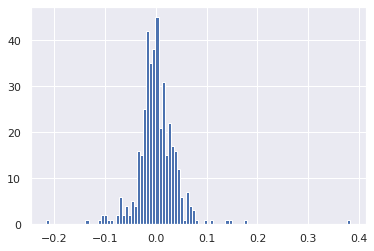

In [53]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

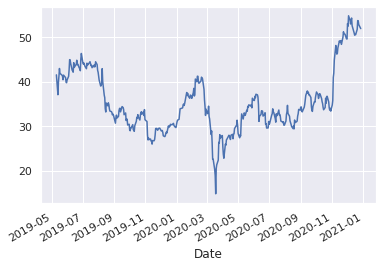

In [54]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [55]:
df 


,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-12-21,49.00,52.350,48.79,51.80,23562858,50.400,50.62,0.023311
2020-12-22,52.11,54.360,51.92,53.78,23885275,52.945,51.80,0.038224
2020-12-23,53.80,54.090,52.99,53.71,12671105,53.755,53.78,-0.001302


In [56]:
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2020-12-21     True
2020-12-22     True
2020-12-23    False
2020-12-24    False
2020-12-28    False
Name: Daily_Change, Length: 413, dtype: bool

In [57]:
df[df.Daily_Change > 0]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2020-12-09,53.98,56.02,53.06,53.79,46712769,53.885,53.01,0.014714
2020-12-10,52.33,54.62,51.30,54.35,20207664,53.340,53.79,0.010411
2020-12-17,50.59,51.30,50.17,50.63,19688316,50.610,50.49,0.002773


In [62]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2020-12-09,53.98,56.02,53.06,53.79,46712769,53.885,53.01,0.014714
2020-12-10,52.33,54.62,51.30,54.35,20207664,53.340,53.79,0.010411
2020-12-17,50.59,51.30,50.17,50.63,19688316,50.610,50.49,0.002773


In [63]:
df_positive.Daily_Change.mean()

0.028744495898824593

In [64]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.290,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.680,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.240,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.280,40.50,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2020-12-16,51.18,51.680,50.29,50.49,19577759,50.835,51.00,-0.010000
2020-12-18,50.81,50.950,49.52,50.62,24355167,50.715,50.63,-0.000198
2020-12-23,53.80,54.090,52.99,53.71,12671105,53.755,53.78,-0.001302


In [67]:
df_negative.Daily_Change.mean()

-0.02407153996066569

In [68]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-12-21    False
2020-12-22    False
2020-12-23    False
2020-12-24    False
2020-12-28    False
Length: 413, dtype: bool

In [69]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554


In [70]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303


In [71]:
df.index

DatetimeIndex(['2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23',
               ...
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-28'],
              dtype='datetime64[ns]', name='Date', length=413, freq=None)

In [72]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [73]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.750,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.300,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.550,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.420,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.620,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2020-12-21,49.00,52.350,48.790,51.80,23562858,50.400,50.62,0.023311
2020-12-22,52.11,54.360,51.920,53.78,23885275,52.945,51.80,0.038224
2020-12-23,53.80,54.090,52.990,53.71,12671105,53.755,53.78,-0.001302


In [75]:
df[(df.index >= '2019-11-01') & (df.index <= '2019-11-15')]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [76]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-15')]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.7,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-15,26.18,26.8,25.9550,26.79,41372771,26.485,25.99,0.030781


In [77]:
df

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-12-21,49.00,52.350,48.79,51.80,23562858,50.400,50.62,0.023311
2020-12-22,52.11,54.360,51.92,53.78,23885275,52.945,51.80,0.038224
2020-12-23,53.80,54.090,52.99,53.71,12671105,53.755,53.78,-0.001302


In [79]:
df.index.month == 5 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [81]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.2900,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [82]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
2020-04-01,26.50,26.7670,24.8101,25.42,38538381,25.960,27.92,-0.089542
2020-05-01,29.13,29.7200,28.3250,28.39,19290192,28.760,30.27,-0.062108
2020-06-01,35.64,36.3900,35.1600,35.82,21893806,35.730,36.32,-0.013767
2020-07-01,30.96,31.2650,30.1622,30.43,13611544,30.695,31.08,-0.020914
2020-09-01,33.45,34.5100,33.1450,34.30,16026170,33.875,33.63,0.019923
